# Allgemeines
## 1. Orthonormale Basis
Wir betrachten reel-wertige Funktionen im Intervall $[0, 2\pi]$:
$f(x)$, die wir mit einer orthonormalen Basis beschreiben möchten,
so wie Vektoren im Cartesischen Koordinatensystem.  
Seien ${e_i}$ und ${e_j}$ zwei Einheitsvektoren dieser
Basis, so gilt für das (geeignet definierte) Skalarprodukt:  

$<{e_i}, {e_j}> = \delta_{ij}$, mit $i, j \in \N$

Es kann leicht gezeigt werden, dass für diese Einheitsvektoren
$sin()$ und $cos()$ geeignet sind:

Sei ${e_i}(x) = sin(i \cdot x)$

so gilt:

$\int_0^{2\pi} sin(i x) sin(j x) dx = \pi \cdot \delta_{ij}$

Genau so für den $cos()$:

$\int_0^{2\pi} cos(i x) cos(j x) dx = \pi \cdot \delta_{ij}$

Und für die gemischten Terme gilt:

$\int_0^{2\pi} sin(i x) cos(j x) dx = 0$

Dies wird im Folgenden mit Hilfe des Package "sympy" gezeigt:


In [19]:
import sympy as smp
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(['fivethirtyeight'])

In [20]:
N_POINTS = 400  # Anzahl der Punkte auf der x-Achse für Plots
N_REIHE = 1  # Anzahl der Glieder, die für die Fourier-Reihe genutzt werden


In [21]:
x, w = smp.symbols('x w', real=True)
i, j = smp.symbols('i j', integer=True, positive=True)
sini = smp.sin(i * x)
sinj = smp.sin(j * x)
cosi = smp.cos(i * x)
cosj = smp.cos(j * x)
sini, sinj, cosi, cosj

(sin(i*x), sin(j*x), cos(i*x), cos(j*x))

$\int_0^{2\pi} sin(i x) sin(j x) dx = \pi \cdot \delta_{ij}$


In [22]:
smp.integrate((sini * sinj), (x, 0, 2 * smp.pi))

Piecewise((0, Ne(i, j)), (pi, True))

$\int_0^{2\pi} cos(i x) cos(j x) dx = \pi \cdot \delta_{ij}$

In [23]:
smp.integrate((cosi * cosj), (x, 0, 2 * smp.pi))

Piecewise((0, Ne(i, j)), (pi, True))

$\int_0^{2\pi} sin(i x) cos(j x) dx = 0$


In [24]:
smp.integrate((sini * cosj), (x, 0, 2 * smp.pi))

0

q.e.d. (quod erat demonstrandum: was zu beweisen war!)

## 2. Fourier-Reihen

Da, wie gezeigt, $sin(k x)$ und $cos(k x)$ ($k \in \N$) eine Orthonormalbasis für Funktionen
auf dem Intervall $[0, 2 \pi]$ darstellen, kann jede Funktion in diesem Intervall
nach dieser Basis entwickelt werden:

$f(x) = \sum_{k=0}^{\inf} \left( a_k sin(k x) + b_k cos(k x) \right)$

Die Koeffizienten $a_k$ und $b_k$ können einfach berechnet werden:

$\int_0^{2\pi} f(x) \cdot sin(m x) dx = $  
$\int_0^{2\pi} \sum_{k=0}^{\inf} \left( a_k sin(k x) + b_k cos(k x) \right) \cdot sin(m x) dx = $  
$\int_0^{2\pi} \sum_{k=0}^{\inf} \left( a_k \cdot \delta_{km} \right) dx = 2 \pi a_m$  

Analog gilt:

$\int_0^{2\pi} f(x) \cdot cos(m x) dx = $  
$\int_0^{2\pi} \sum_{k=0}^{\inf} \left( a_k sin(k x) + b_k cos(k x) \right) \cdot cos(m x) dx = $  
$\int_0^{2\pi} \sum_{k=0}^{\inf} \left( b_k \cdot \delta_{km} \right) dx = 2 \pi b_m$  


### Beispiel: Rechteck-Funktion

Die Funktion sei $0$ im Intervall $[0, \pi)$ und $1$ im Intervall $[\pi, 2 \pi]$.

In [25]:
# func = smp.Function('func', real = True)
func = smp.symbols('func', real = True)

def func(x):
    if (x < smp.pi):
        return 0.0
    else:
        return 1.0


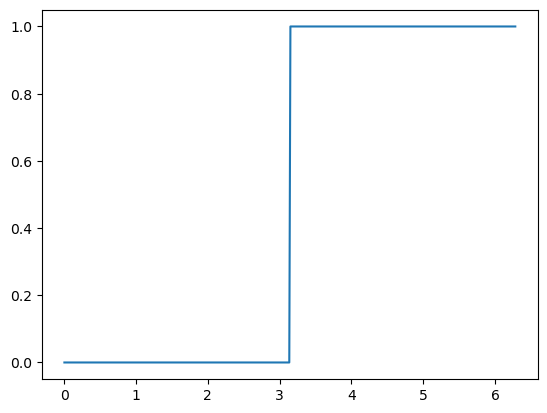

In [26]:
x_values = np.linspace(0, 2.0 * 3.14159265, N_POINTS)

func_values = []
for i in range(len(x_values)):
    func_values.append(func(x_values[i]))

plt.plot(x_values, func_values)


Berechnung der $a_m$:

In [27]:
a_values = []
for k in range(N_REIHE):
    a = smp.integrate((smp.sin(k*x)), (x, smp.pi, 2 * smp.pi))
    a_values.append(a)

a_values  # Faktor 1/(2 pi) fehlt noch!


[0]

Berechnung der $b_m$:

In [28]:
b_values = []
for k in range(N_REIHE):
    # b = N(smp.integrate((smp.cos(k*x)), (x, smp.pi, 2 * smp.pi)))
    b = smp.integrate((smp.cos(k*x)), (x, smp.pi, 2 * smp.pi))
    b_values.append(b)

b_values  # Faktor 1/(2 pi) fehlt noch!


[pi]

Jetzt setzen wir die Fourier-Reihe zusammen:


In [29]:
Fourier_Reihe = np.zeros(N_POINTS)

for k in range(N_REIHE):
    for l in range(N_POINTS):
            Fourier_Reihe[l] += a_values[k] + sin(k * x_values[l])
            Fourier_Reihe[l] += b_values[k] + cos(k * x_values[l])
        
for l in range(N_POINTS):
    Fourier_Reihe[l] /= (2.0 * smp.pi)

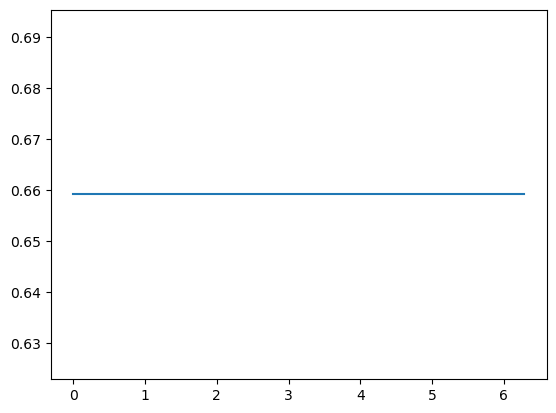

In [30]:
plt.plot(x_values, Fourier_Reihe)


Das hätten wir jetzt nicht bei 0.66 sondern bei 0.5 erwartet.  
Hier stimmt irgend etwas nicht!!!